## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

C:\Users\Abbas\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

__Reading the ab_data into df__

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.


__Number of rows = 294478__

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

__Number of unique users = 290584__

In [4]:
number_of_users = df.user_id.nunique()
number_of_users

290584

d. The proportion of users converted.

__Proportion of users converted is the number of converted users / the total number of users in the dataset__

__Converted proportion is 12.1%__

In [5]:
# none_converted = df.groupby(['converted']).nunique().user_id[0] # Number of none converted users
converted = df.groupby(['converted']).nunique().user_id[1] # Number of converted users
converted_proportion = (converted / number_of_users) * 100  # Get converted users proportion
converted_proportion

12.104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

__The number of times where the `new_page` and `treatment` don't line up is a summation of:__

__Occurance of `new_page` lineup with the `control group`__

__Occurance of `old_page` lineup with the `treatment group`__


In [6]:
df.groupby(['group', 'landing_page']).count()
# count the number where the new_page lineup with the control group
control_newpage = df.query('group == "control" & landing_page == "new_page"').count()[0]

# count the number where the old_page lineup with the treatment group
treatment_oldpage = df.query('group == "treatment" & landing_page == "old_page"').count()[0]

control_newpage + treatment_oldpage


3893

f. Do any of the rows have missing values?

__No missing values in the dataset__

In [7]:
df.duplicated().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

__The steps to perform this cleaning are as follows:__

1. copy the complete set to df2
2. Store the first list in (to_del_1) where we have control and new_page match
3. Store the second list in (to_del_2) where we have treatment and old_page match
4. Perform the removal of the unwanted lists
5. Check the new size of df2 after removal


In [8]:
# copy the complete dataset to df2

df2 = df.copy() 

# we have 2 lists to delete for the dataset df2

# store the first list in (to_del_1) where we have control and new_page match 

to_del_1 = df2.loc[(df2['group'] == "control") & (df2['landing_page'] == "new_page")].index.tolist()

# store the second list in (to_del_2) where we have treatment and old_page match

to_del_2 = df2.loc[(df2['group'] == "treatment") & (df2['landing_page'] == "old_page")].index.tolist()

# perform the removal of the unwanted lists
df2 = df2.drop(to_del_1)
df2 = df2.drop(to_del_2)

# check the new (df2) size

df2.shape


(290585, 5)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

__There are 290584 unique users in df2__

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

__The user_id of the repeated user is 773192__

In [11]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

__List the duplicated user_id__

In [13]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


__Perform the drop operation __

In [14]:
df2.drop(1899, inplace=True)

__Confirm the drop operation__

In [15]:
df2.query('user_id == 773192')


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
df2.query('landing_page == "new_page"').count()[0] / df2.shape[0]

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**Your answer goes here.**

__The results in the previous two portions are very close and there is no evidence in my opinion that one page will lead to more conversions.__

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



__The null hypothesis will be rejected if the conversion rate of the new page is heigher than the conversion rate of the old page:__

__$$H_0: p_{old}\ge p_{new}$$__
__$$H_1: p_{old}\lt p_{new}$$__

__Alternatively, our Hypothesis test can be:__

__$$H_0: p_{new} - p_{old} \le 0$$__
__$$H_1: p_{new} - p_{old} \gt 0$$__

__Where $p_{new}$ & $p_{old}$ are the population mean values for new_page and old_page, respectivley.__



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

__Here we are assuming that the $p_{new}$ and $p_{old}$ are equal.__
__To perform the sampling:__

__* 3 arrays have beeen created (diffs: store the difference in means, old_means: store the values of the old mean, new_means: store the values of the new mean)__

__* Bootstrapped the sample with size of df.shape[0] which should be the size of the ab_data size as instructed.__


In [20]:
diffs, old_means, new_means = [], [], []

old_mean = 0
new_mean = 0

# Bootstrap the sample

for i in range(10000):
    bootstrap = df2.sample(df.shape[0], replace = True)
    #bootstrap = df2.sample(100, replace = True)
    old_mean = bootstrap.query('landing_page == "old_page"').converted.mean()
    new_mean = bootstrap.query('landing_page == "new_page"').converted.mean()
    # Append the old_mean
    old_means.append(old_mean)
    # Append the new_mean
    new_means.append(new_mean)
    # Append the diff between new and old means
    diffs.append(new_mean - old_mean)

    

__Plotting the difference in means and marking where lower and upper limits for 5% error rate__

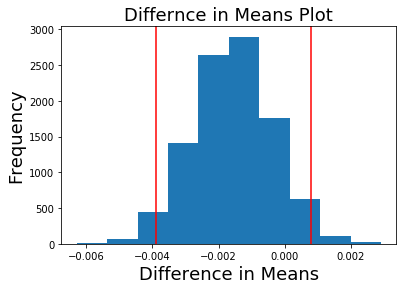

In [47]:
lower, upper = np.percentile(diffs, 2.5), np.percentile(diffs, 97.5) 
plt.hist(diffs);
plt.axvline(x=lower, color = "red");
plt.axvline(x=upper, color = "red");
plt.xlabel('Difference in Means', fontsize = 18);
plt.ylabel('Frequency', fontsize = 18);
plt.title('Differnce in Means Plot', fontsize = 18);

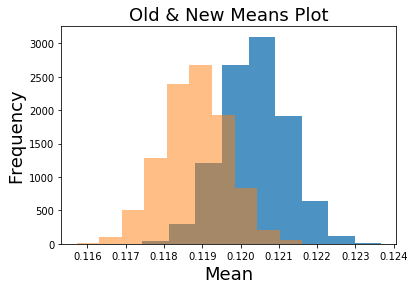

In [62]:
# Plotting the samples of the old and new means
plt.hist(old_means, alpha = 0.8);
plt.hist(new_means, alpha = 0.5);
plt.legend()
plt.ylabel('Frequency', fontsize = 18);
plt.xlabel('Mean', fontsize = 18);
plt.title('Old & New Means Plot', fontsize = 18);


__The 2 samples and the difference in means  are normally distributed__

In [28]:
# The standard deviation of the sampling distribution for new_page
np.std(new_means)

0.00084559696056872612

In [29]:
# The standard deviation of the sampling distribution for old_page
np.std(old_means)

0.0008472944512172431

In [30]:
# The standard deviation for the sampling distribution for difference in means
np.std(diffs)

0.0011991690484582341

__As we have the the standard deviation of the sampling distribution of the difference in means, lets simulate draws from the sampling distribution under the null hypothesis.__

In [31]:
null_vals = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null

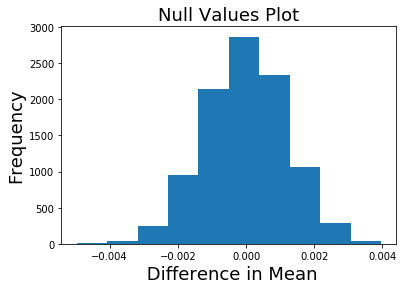

In [63]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null
plt.ylabel('Frequency', fontsize = 18);
plt.xlabel(' Difference in Mean', fontsize = 18);
plt.title('Null Values Plot', fontsize = 18);


a. What is the **convert rate** for $p_{new}$ under the null? 

__Assuming under the null hypothesis, $p_{new}$ and $p_{old}$ are equal to the converted rate in ab_data.csv__

In [36]:
#p_new = df2.converted.mean()
p_new = df2.query('landing_page == "new_page"').converted.mean()
p_new

0.11880806551510564

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [37]:
#p_old = df2.converted.mean()
p_old = df2.query('landing_page == "old_page"').converted.mean()
p_old

0.1203863045004612

__Finding the difference between  $p_{old}$ and $p_{new}$  <br><br>__

In [38]:
p_new - p_old

-0.0015782389853555567

c. What is $n_{new}$?

__$n_{new}$ is the count (number of rows) where we have new_page as the landing page__

In [39]:
n_new = df2.query('landing_page == "new_page"').count()[0]
n_new

145310

d. What is $n_{old}$?

__$n_{old}$ is the count (number of rows) where we have old_page as the landing page__

In [40]:
n_old = df2.query('landing_page == "old_page"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

__Using the random.choice function to simulate $n_{new}$ transactions with $p_{new}$ propability for 1's and 1 - $p_{new}$ for 0's__

In [41]:
new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
new_page_converted.mean()

0.88227238318078594

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

__Using the random.choice function to simulate $n_{old}$ transactions with $p_{old}$ propability for 1's and 1 - $p_{old}$ for 0's__

In [42]:
old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
old_page_converted.mean()

0.88037776890565411

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [43]:
new_page_converted.mean() - old_page_converted.mean() 

0.0018946142751318229

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

__To perform the sampling:__

__* 3 arrays have beeen created (p_diffs: store the difference , bs_old_means: store the values of the old mean, bs_new_means: store the values of the new mean)__

__* For 10000 times, perform the sampling using random.choice and store the difference in means in the p_diffs__


In [44]:
p_diffs, bs_new_means,  bs_old_means  = [], [], []

for i in range(10000):
    bs_new = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
    bs_old = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
    bs_new_means.append(bs_new.mean())
    bs_old_means.append(bs_old.mean())
    p_diffs.append(bs_new.mean() - bs_old.mean())



In [45]:
np.mean(bs_new_means), np.mean(bs_old_means), np.mean(p_diffs)

(0.88119385038882392, 0.87960677891432737, 0.0015870714744964842)

In [46]:
np.std(p_diffs)


0.0012005910451093654

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

__The plot shows the expected result because of the Central Limit Theorm which states that; given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population__

__in our case, the Central Limit Theorem applies to the difference in means which is the $p_{new}$ - $p_{old}$__

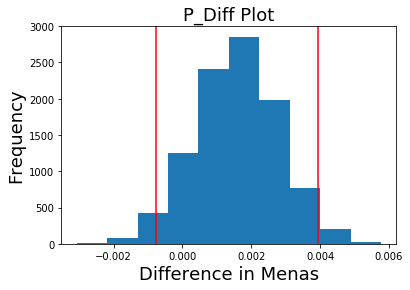

In [66]:
plt.hist(p_diffs);
lower, upper = np.percentile(p_diffs, 2.5), np.percentile(p_diffs, 97.5) 

plt.axvline(x=lower, color = "red");
plt.axvline(x=upper, color = "red");
plt.ylabel('Frequency', fontsize = 18);
plt.xlabel('Difference in Menas', fontsize = 18);
plt.title('P_Diff Plot', fontsize = 18);


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

__Obtained the actual difference in means which is stored in actual_diff and marking where the actual difference under the null__


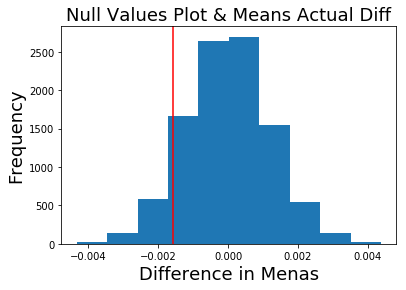

In [67]:
actual_diff = df2.query('landing_page == "new_page"').converted.mean() - df2.query('landing_page == "old_page"').converted.mean()
p_diffs = np.array(p_diffs)
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# plot null distribution
plt.hist(null_vals);

# plot line for observed statistic
plt.axvline(actual_diff, color = "red");
plt.ylabel('Frequency', fontsize = 18);
plt.xlabel('Difference in Menas', fontsize = 18);
plt.title('Null Values Plot & Means Actual Diff', fontsize = 18);


__Get the the proportion where difference in means is greater than the  actual_diff__

In [68]:
(null_vals > actual_diff).mean()

0.90649999999999997

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The proprtion where we have p_diffs greater than the actual difference in the population is the p-value. The p-value found was large which suggest that we do not hve evidence to reject the null hypothesis, thus, we should not assume that the new_page is better than the old_page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [69]:
convert_old = df2.query('landing_page == "old_page" & converted == "1"').count()[0]
convert_new = df2.query('landing_page == "new_page" & converted == "1"').count()[0]

n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [70]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
z_score, p_value

(1.3109241984234394, 0.18988337448195103)

In [71]:
# how significant our z-score is
from scipy.stats import norm
norm.cdf(z_score)




0.90505831275902449

In [72]:
#our critical value at 95% confidence is

norm.ppf(1-(0.05/2))


1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The p-value (0.9037) computed in j & k parts is different than the p-value (0.1899) calculated by the z-test method and this is because we did consider from the start that $p_{old}$ and $p_{new}$ are equal which is not the case in the z-test.**

**However, since the z-score (0.905) is less than our critical value at 95% confidence (1.96), we fail to reject the null hypothesis that the difference between the two proportions is no different from zero.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we have a yes/no or binary type category, Logistic regression is the model that we need to use in this case for regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [73]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [74]:
#This function will return the value that should be stored in the ab_page column depending on the group data cell for a row
def label_abpage (row):
   if row['group'] == "control" :
      return 0
   elif row['group'] == "treatment" :
      return 1

In [75]:
# create the intercept column
#df2['intercept'] = 1

# create the ab_page column and fill the column data
df2['ab_page'] = df2.apply (lambda row: label_abpage (row),axis=1)
df2['intercept'] = 1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [76]:
from scipy import stats
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2) # https://github.com/statsmodels/statsmodels/issues/3931


mod = sm.Logit(df2['ab_page'], df2[['converted','intercept']])
res = mod.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.693144
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 01 Dec 2017   Pseudo R-squ.:               4.266e-06
Time:                        01:23:06   Log-Likelihood:            -2.0142e+05
converged:                       True   LL-Null:                   -2.0142e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
converted     -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept      0.0020      0.004      0.516      0.606      -0.006       0.010
==============================================================================
"""

In [77]:
print(np.exp(res.params))

converted    0.985123
intercept    1.002042
dtype: float64


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

>__Running [np.exp(res.params)] will give us the odds of coverted which is (0.98). So the odds of conversion is very close to 1 which means that the probability of having someone to convert is almost equal to the probability of not having someone to convert to the new_page. This supports our null hypothesis and there is no evidence that the new_page is better.__

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

>**Looking at the result of the logit regression model, our intercept $b_0$ is (0.002) and the slope $b_1$ is (-0.015), so ab_page is a function of ($b_0$ + $b_1$ * converted). However, this formual is best applied for Linear regression models. When using the Logistic regression models, we are looking after probability and the odds of the outcome. Running [np.exp(res.params)] will give us the odds of coverted which is (0.98). So the odds of conversion is very close to 1 which means that the probability of having someone to convert is almost equal to the probability of not having someone to convert to the new_page. This supports our null hypothesis and there is no evidence that the new_page is better.**

>**The p-value (0.1899) computed by the logistic regression is same as the one calculated by the z-test function. Again both of these p-values are different that the one calculated in j & k parts and this is because we did consider from the start that $p_{old}$ and $p_{new}$ are equal which is not the case in the z-test and the logistic regression model.**

>**The p-value (0.1899) is high which supports the failure of rejection to the null hypothesis**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Other factors might influence the conversion of indviduals like gender for example. It could be possible that the new_page is more favored by females more than males depening on the design. Moreover, it is important to take into considerations the factors that might affect the conversion rate for any given case. Having additional terms to our model is great as long as they are relevant to the case. More terms can provide more insights and increase/decrease our confidence when either rejecting the null hypothesis or the failure of rejecting the null hypothesis **

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

>**Answer:**
>**Country does not have an impact on conversion. In fact, the conversion rate for all the 3 countries is almost equal**

>**Ratio of conversion by country is below**
 			

>**CA : 0.115318**

>**UK : 0.120594**

>**US : 0.119547**

>**It seems that country does not have an impact on conversion. However, we need to dig deeper and provide more statistical answers to this question by fitting our data into a model and check for probabilities.**

__Reading the countries data and store them into df_countries__

In [78]:
df_countries = pd.read_csv('./countries.csv')
df_countries.groupby('country').count()

,user_id
country,
CA,14499
UK,72466
US,203619


__Merging the countries data with df2 and store them into df3. The new dataset that will be used for the rest of the project is df3__

In [79]:
#df_countries.info()

#df3 = df2.set_index('user_id').join(df_countries.set_index('user_id'))
df3 = df2.merge(df_countries)
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US


__Counting the conversion rate for each country__

In [80]:
df3.query('country == "US"').converted.mean(),df3.query('country == "UK"').converted.mean(),df3.query('country == "CA"').converted.mean()

(0.1195468006423762, 0.12059448568984076, 0.11531829781364232)

In [81]:
df3.groupby('country').mean()

,user_id,converted,ab_page,intercept
country,,,,
CA,788640.270639,0.115318,0.503552,1.0
UK,787678.848246,0.120594,0.498247,1.0
US,788075.662148,0.119547,0.500459,1.0


__Creating the dummy variables for the countries using pd.get_dummies__

In [82]:
dummy = pd.get_dummies(df3['country'], prefix='country_code')
dummy.head()

,country_code_CA,country_code_UK,country_code_US
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


__Joining the dummy table to df3__

In [83]:
df3 = df3.join(dummy)
df3.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,country,country_code_CA,country_code_UK,country_code_US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,US,0,0,1


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

__Running a logistic regression model for df3 check for probability of conversion for the 3 countries__

In [85]:
mod = sm.Logit(df3['ab_page'], df3[['converted','country_code_CA','country_code_UK','country_code_US','intercept']])
res = mod.fit()
res.summary()

         Current function value: 0.693141
         Iterations: 35


C:\Users\Abbas\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 01 Dec 2017   Pseudo R-squ.:               8.682e-06
Time:                        01:23:31   Log-Likelihood:            -2.0142e+05
converged:                      False   LL-Null:                   -2.0142e+05
                                        LLR p-value:                    0.3211
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
converted          -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_code_CA     0.0124   1.41e+05   8.77e-08      1.000   -2.76e+05    2.76e+05
country_code_UK    -0.0088   1.41e+05  -6.23e-08      1.000   -2.76e+05    2.76e+05
country_code_US  4.965e-05   1.41e+05   3.52e-10      1.000   -2.76e+05    2.76e+05
intercept           0.0036   1.41e+05   2.54e-08      1.000   -2.76e+05    2.76e+05
===================================================================================
"""

__Obtaining the odds__

In [86]:
print(np.exp(res.params))

converted          0.985168
country_code_CA    1.012435
country_code_UK    0.991257
country_code_US    1.000050
intercept          1.003580
dtype: float64


**Running [np.exp(res.params)] will give us the following odds:**

**converted          0.985168**

**country_code_CA    1.012435**

**country_code_UK    0.991257**

**country_code_US    1.000050**

**The odds of all the 3 countries is almost equal to 1 which means that the probabilities of having someone to convert from any of the 3 given counties is equal. Thus, counties as a factor does not have an impact on conversion rate.**

**Again, we fail to reject our null hypothesis even when considering countries as a factor.**

# <a id='conclusions'></a>
## Conclusions##

For this project, we have investigated a dataset for an e-commerce website to help the e-commerce company whether to implement the new page or keep the old page.

### Data Wrangling

>The investigated dataset contains (294478) rows and has the following data types:
>- user_id: ID of the user
>- timestamp: Time of visiting a page
>- group: (control) or (treatment)
>- landing_page: (old_page) or (new_page)
>- converted: (0) if user not converted or (1) if user converted

>- We have also found out that there are entries in the dataset where the new_page and the treatment group don’t lineup (wrong data). The dataset has been cleaned by removing the incorrect data.
>- No duplication of rows was found. However, there is a user_id (773192) which has a repeated entry in the dataset. The repeated entry was removed

 
### Probability Findings:
 
> - Proportion of conversion = 12.10%
> - Probability of an individual converting regardless of the page they receive = 0.1196
> - Probability of an individual converting from the control group = 0.1203
> - Probability of an individual converting from the treatment group   = 0.1188
> - Probability of an individual received the new page = 0.5000
 
> - From the probability findings, there is no evidence that the new page is better than the old page since there is no tangible difference between the probabilities of conversion for both pages. This is an initial thought and more statistical investigation need to be performed at this stage.

### A/B Test
 
>Assuming the old page is better unless the new page proves to be definitely better at Type I error rate of 5%, our null and alternative hypothesis is below:

>$H_0: p_{new} − p_{old}≤0$

>$H_1: p_{new} − p_{old}>0$

>Where $p_{new}$ & $p_{old}$ are the population mean values for new_page and old_page, respectivley.

>Under the assumption that the $p_{new}$ and $p_{old}$ are equal;
>- A bootstrap sample has been created with the size of ab_data.csv for 10,000 times to calculate the difference in means between the old_page and the new_page.
>- The plots of the difference in means, old_page mean, and new_page mean are normally distributed.
>- A simulation of $n_{new}$ transactions was created with a probability of $p_{new}$ for 1's and 1 - $p_{new}$ for 0's
>- A simulation of $n_{old}$ transactions was created with a probability of $p_{old}$ for 1's and 1 - $p_{old}$ for 0's
>- For 10,000 times, the sampling was performed using random.choice to store the difference in means in the p_diffs
>- The plot of p_diffs shows the expected result because of the Central Limit Theorem which states that; given a sufficiently large sample size from a population with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population

>In our case, the Central Limit Theorem applies to the difference in means which is the $p_{new}$ - $p_{old}$

### Finding The p-value:

>- Obtained the proportion where difference in means (p_diffs) is greater than the actual difference which is = 0.9041
>The proportion where we have p_diffs greater than the actual difference in the population is the p-value. The p-value found was large which suggest that we do not have evidence to reject the null hypothesis, thus, we should not assume that the new_page is better than the old_page.

### Z-test Statistics:
>- a z-test statistics was run to check which page is statistically better (old_page or new_page)

>The Hypothesis:

>    The null hypothesis is that there is no difference between the two proportions.

>    The alternative is that there is a statistical difference between the two proportions.

>Since the z-score of 1.310 is less than the critical value of 1.9599, we fail to reject the null hypothesis

### Logistic Regression Modeling I

>Because we have a binary type data for either conversion or no conversion, the model used in the project is the Logistic Regression Model.

>At first, the model did not work because of an error (module 'scipy.stats' has no attribute 'chisqprob'). I have come across a workaround for this error by adding the following code before modeling:
stats.chisqprob = lambda chisq, df2: stats.chi2.sf(chisq, df2)

>The workaround was provided in this link: https://github.com/statsmodels/statsmodels/issues/3931

>For the first model, ab_page column was created and populated with 0 for control and 1 for treatment

>#### Model Result:

>Looking at the result of the logit regression model, our intercept $b_0$ is (0.002) and the slope $b_1$ is (-0.015), so ab_page is a function of ($b_0$ + $b_1$ * converted). However, this formula is best applied for Linear regression models. When using the Logistic regression models, we are looking after probability and the odds of the outcome. Running [np.exp(res.params)] will give us the odds of converted which is (0.98). So the odds of conversion is very close to 1 which means that the probability of having someone to convert is almost equal to the probability of not having someone to convert to the new_page. This supports our null hypothesis and there is no evidence that the new_page is better.

>The p-value (0.1899) computed by the logistic regression is same as the one calculated by the z-test function. Again both of these p-values are different that the one calculated in j & k parts and this is because we did consider from the start that $p_{old}$ and $p_{new}$ are equal which is not the case in the z-test and the logistic regression model.

>The p-value (0.1899) is high which supports the failure of rejection to the null hypothesis

### Considering Other Factors:
Other factors might influence the conversion of individuals like gender for example. It could be possible that the new_page is more favored by females more than males depending on the design. Moreover, it is important to take into considerations the factors that might affect the conversion rate for any given case. Having additional terms to our model is great as long as they are relevant to the case. More terms can provide more insights and increase/decrease our confidence when either rejecting the null hypothesis or the failure of rejecting the null hypothesis 

### Logistic Regression Modeling II (Considering other factors)
For the second model, we considered the countries as a factor in our model to see if there is an impact in the conversion rate or not.
Before running the model, the ratio of conversion in all the 3 countries (US/UK/CA) are very close which gives an initial indication that the country does not have an impact on conversion.

To run the model, 3 additional dummy columns (country_code_CA/country_code_UK/country_code_US) have been added which contain variables of the countries

>#### Model Result:
Running [np.exp(res.params)] gave us the following odds:

>Converted 0.985168

>country_code_CA 1.012435

>country_code_UK 0.991257

>country_code_US 1.000050

>The odds of all the 3 countries is almost equal to 1 which means that the probabilities of having someone to convert from any of the 3 given counties is equal. Thus, counties as a factor does not have an impact on conversion rate.

>Again, we fail to reject our null hypothesis even when considering countries as a factor.


In conclusion, we recommend keeping the old page for the e-commerce website as there is no statistical evidence that the new page is better.
